In [2]:
import Pkg
Pkg.add("JuMP")
Pkg.add("Ipopt")
Pkg.add("Plots")
Pkg.add("Random")
Pkg.add("Distributions")
Pkg.add("FinancialToolbox")
Pkg.add("StatsBase")
using JuMP
using Random 
using Ipopt
using Distributions
using StatsBase
using FinancialToolbox
using Plots

  Installing known registries into `C:\Users\nayan\.julia`
       Added `General` registry to C:\Users\nayan\.julia\registries
    Updating registry at `C:\Users\nayan\.julia\registries\General.toml`
   Resolving package versions...
   Installed DiffRules ──────────── v1.15.1
   Installed SpecialFunctions ───── v2.5.0
   Installed IrrationalConstants ── v0.2.4
   Installed DiffResults ────────── v1.1.0
   Installed MutableArithmetics ─── v1.6.3
   Installed JSON ───────────────── v0.21.4
   Installed JSON3 ──────────────── v1.14.1
   Installed Preferences ────────── v1.4.3
   Installed BenchmarkTools ─────── v1.6.0
   Installed Bzip2_jll ──────────── v1.0.9+0
   Installed CodecBzip2 ─────────── v0.8.5
   Installed Parsers ────────────── v2.8.1
   Installed StaticArraysCore ───── v1.4.3
   Installed JLLWrappers ────────── v1.7.0
   Installed NaNMath ────────────── v1.1.2
   Installed PrecompileTools ────── v1.2.1
   Installed OrderedCollections ─── v1.8.0
   Installed CommonSubexpressio

In [3]:
y=Normal(0,1)
a(x)=cdf.(y,x)
b(z)=pdf.(y,z)
function BSCP(K, T, S0, r, y, sigma)
    numerator = log(S0./K) + (r-y+0.5*sigma.^2).*T;
    denominator = sigma.*sqrt(T);
    d1 = numerator./denominator;
    d2 = d1 - denominator;
    cprice = S0 *exp(-y*T).* a(d1) - exp(-r.*T).*K.*a(d2);
    delta = a(d1);
    gamma = b(d1) ./ (S0.*denominator);
    cprice, delta, gamma
end

BSCP (generic function with 1 method)

In [4]:
BSCP_1=BSCP(1800,0.08333,1795.85,0.00172967,0.019702,0.10824)

(19.138183663398195, 0.45771908348739965, 0.007069737566693436)

In [6]:
taylor_val_1=[]
for S0 in 1200:20:2400
    taylor=BSCP_1[1] + BSCP_1[2]*(S0-1795.85)
    append!(taylor_val_1, taylor)
end

In [7]:
taylor_val_2=[]
for S0 in 1200:20:2400
    taylor=BSCP_1[1] + BSCP_1[2]*(S0-1795.85) +0.5*BSCP_1[3]*(S0-1795.85)^2
    append!(taylor_val_2, taylor)
end

In [8]:
call_price_5=[]
for S0 in 1200:20:2400
    k=BSCP(1800,0.083333,S0,0.00172967,0.019702,0.10824)
    append!(call_price_5, k[1])
end

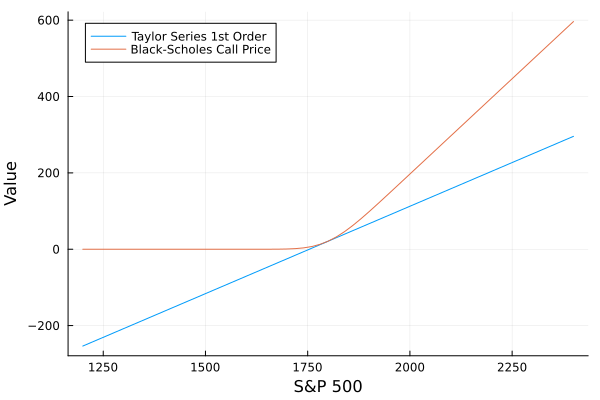

In [9]:
scatter()
plot!(1200:20:2400, taylor_val_1, xlabel="S&P 500", ylabel="Value", label="Taylor Series 1st Order")
plot!(1200:20:2400, call_price_5, xlabel="S&P 500", label="Black-Scholes Call Price")

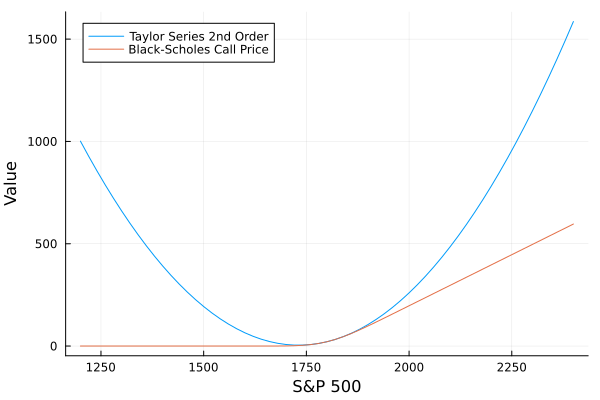

In [10]:
scatter()
plot!(1200:20:2400, taylor_val_2, xlabel="S&P 500", ylabel="Value", label="Taylor Series 2nd Order")
plot!(1200:20:2400, call_price_5, xlabel="S&P 500", label="Black-Scholes Call Price")

In [11]:
call_price=[]
for sigma in 0.05:0.05:0.80
    k=BSCP(1800,0.083333,1795.85,0.00172967,0.019702,sigma)
    append!(call_price,k[1])
end

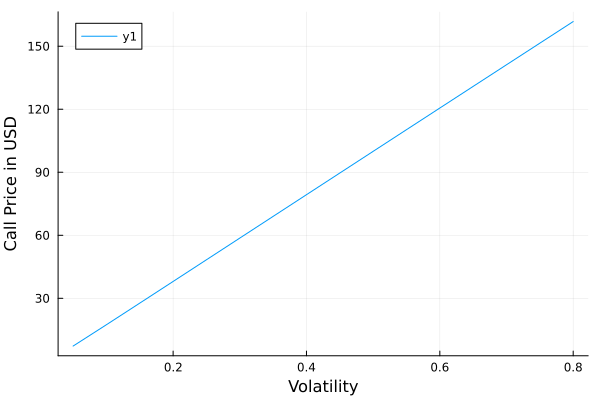

In [12]:
scatter()
plot!(0.05:0.05:0.80, call_price, xlabel="Volatility", ylabel="Call Price in USD")

In [13]:
call_price_2=[]
for T in 0:0.0125:5
    k=BSCP(1800,T,1795.85,0.00172967,0.019702,0.10824)
    append!(call_price_2, k[1])
end

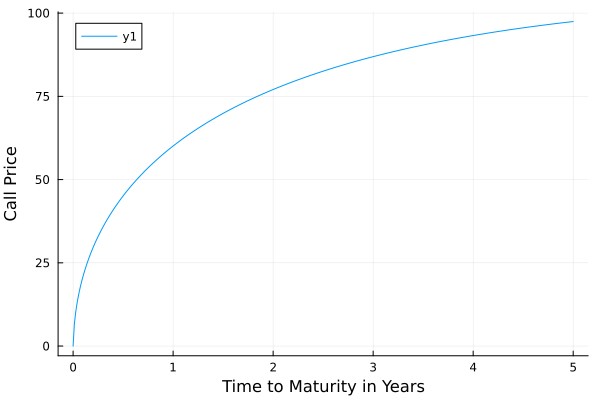

In [14]:
scatter()
plot!(0:0.0125:5, call_price_2, xlabel="Time to Maturity in Years", ylabel="Call Price")

In [15]:
call_price_3=[]
for r in 0:0.0025:0.14
    k=BSCP(1800,0.083333,1795.85,r,0.019702,0.10824)
    append!(call_price_3,k[1])
end

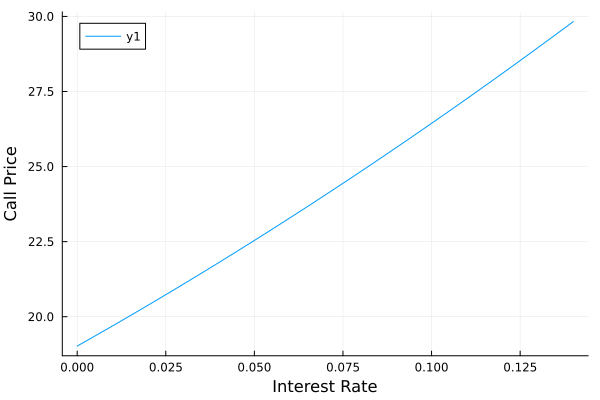

In [16]:
scatter()
plot!(0:0.0025:0.14, call_price_3, xlabel="Interest Rate", ylabel="Call Price")

In [17]:
intrinsic_value=[]
for S0 in 700:10:3000
    int_value=max(S0-1800, 0)
    append!(intrinsic_value,int_value)
end

In [18]:
call_price_4=[]
for S0 in 700:10:3000
    k=BSCP(1800,0.083333,S0,0.00172967,0.019702,0.10824)
    append!(call_price_4,k[1])
end

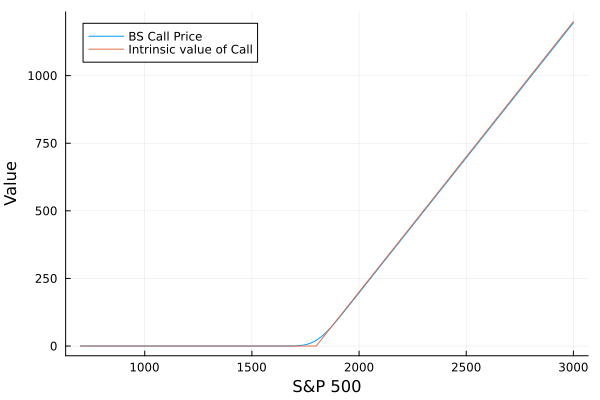

In [19]:
scatter()
plot!(700:10:3000, call_price_4, xlabel="S&P 500", ylabel="Value", label="BS Call Price")
plot!(700:10:3000, intrinsic_value, label="Intrinsic value of Call")

In [20]:
y=Normal(0,1)
a(x)=cdf.(y,x)
function BSPP(K, T, S0, r, y, sigma)
    numerator = log(S0./K) + (r-y+0.5*sigma.^2).*T;
    denominator = sigma.*sqrt(T);
    d1 = numerator./denominator;
    d2 = d1 - denominator;
    pprice = - S0 *exp(-y*T).* a(-d1) + exp(-r.*T).*K.*a(-d2);
    pprice
end

BSPP (generic function with 1 method)

In [21]:
intrinsic_value_put=[]
for S0 in 700:10:3000
    int_value=max(1800-S0, 0)
    append!(intrinsic_value_put,int_value)
end

In [22]:
put_price_1=[]
for S0 in 700:10:3000
    k=BSPP(1800,0.083333,S0,0.00172967,0.019702,0.10184)
    append!(put_price_1, k)
end

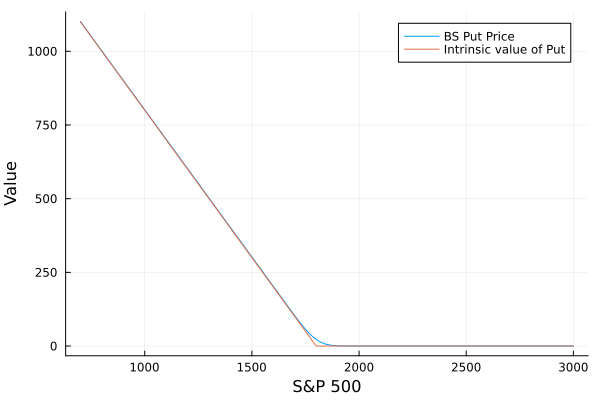

In [23]:
scatter()
plot!(700:10:3000, put_price_1, xlabel="S&P 500", ylabel="Value", label="BS Put Price")
plot!(700:10:3000, intrinsic_value_put, label="Intrinsic value of Put")

In [24]:
call_strike=1850
cp=3.4
call_price_sold=[]
for S0 in 1600:10:2000
    if S0>1850
    payoff=cp+1850-S0
        append!(call_price_sold, payoff)
    else payoff=cp
        append!(call_price_sold, payoff)
end
end

In [25]:
put_strike=1750
pp=7.95
put_price_sold=[]
for S0 in 1600:10:2000
    if S0>1750
    payoff=pp
        append!(put_price_sold, payoff)
    else payoff=pp+S0-1750
        append!(put_price_sold, payoff)
end
end

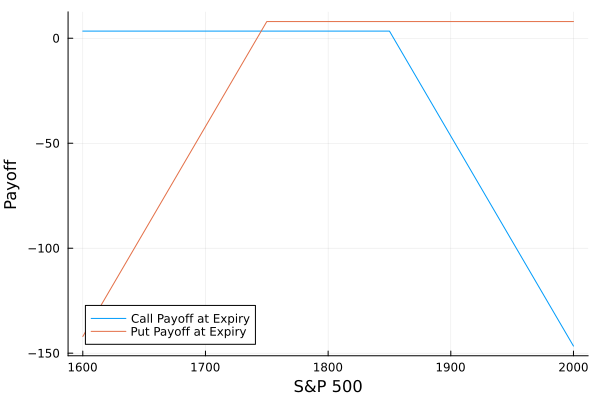

In [26]:
scatter()
plot!(1600:10:2000, call_price_sold, xlabel="S&P 500", ylabel="Payoff", label="Call Payoff at Expiry")
plot!(1600:10:2000, put_price_sold, xlabel="S&P 500", ylabel="Payoff", label="Put Payoff at Expiry")

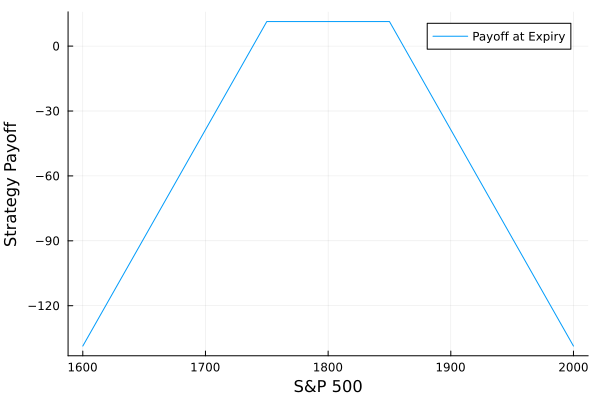

In [27]:
strategy_payoff=call_price_sold+put_price_sold
scatter()
plot!(1600:10:2000, strategy_payoff, xlabel="S&P 500", ylabel="Strategy Payoff", label="Payoff at Expiry")